In [ ]:
# 터미널에서 pip install image

In [2]:
from PIL import Image
import os
import numpy as np


data_dir = "./images/"
files = os.listdir(data_dir)
images =[]
for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

In [3]:
# 이미지 전처리
# 이미지 크기를 일정한 크기로 리사이즈, RGB 채널
# array 생성 : 저장하기 위해서
import tensorflow as tf
resized_images = np.array(np.zeros((len(images),224,224,3)))

for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224,224])

# 아래 함수에 전달한다.-모바일 넷에 적용할 함수
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [4]:
# 사전학습 모델을 생성하고 이를 이용해서 모델 분류 결과 확인
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights='imagenet')
# 전처리한 'preprocessed_images'를 불러온다.
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)

# 가장 높은 데이터 1개만 전달받는다.
topK =1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top=topK)

35363/35363 [==============================] - 0s 0us/step


In [5]:
y_pred_top

[[('n03832673', 'notebook', 0.44874388)],
 [('n04467665', 'trailer_truck', 0.52359205)],
 [('n01944390', 'snail', 0.9236535)],
 [('n07747607', 'orange', 0.97127825)],
 [('n02980441', 'castle', 0.7764982)]]

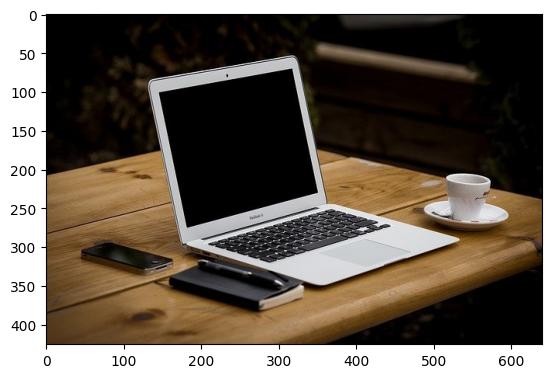

NameError: name 'K' is not defined

In [7]:
from matplotlib import pyplot as plt
import numpy as np
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    for i in range(topK):
        print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%)')

In [ ]:
# 전이학습 ####
# 터미널에서 pip install tensorflow-datasets 를 입력해서
# 데이터셋 - 강아지와 고양이-를 다운받는다.

In [9]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

raw_train, raw_test =tfds.load(
    'cats_vs_dogs',
    # 데이터를 8:2로 나눔
    split =['train[:80%]', 'train[20%:]'],
    # input/label로 된 튜플 형태(true)로 반환된다.
    as_supervised = True
)

Dataset cats_vs_dogs downloaded and prepared to C:\Users\iii\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


In [10]:
import numpy as np
import tensorflow as tf

# resize 알고리즘은 bicubic알고리즘 활용
def preprocess(image, label):
    
    out_image = tf.image.resize(image, [224,224], method=tf.image.ResizeMethod.BICUBIC)
    out_image = tf.keras.applications.mobilenet_v2.preprocess_input(out_image)
    return out_image, label
batch_size =32
#map 함수를 전달하고 batch함수를 사용해서 batch를 진행한다.
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)